<a href="https://colab.research.google.com/github/srewashimondal/NLP-Book-Recommendation/blob/main/book_rec_decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"srewashimondal01","key":"98568169e4d468296deedc1d64ec7741"}'}

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d dk123891/books-dataset-goodreadsmay-2024

Dataset URL: https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024
License(s): MIT
books-dataset-goodreadsmay-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
#Unzip the dataset
!unzip books-dataset-goodreadsmay-2024.zip

Archive:  books-dataset-goodreadsmay-2024.zip
replace Book_Details.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Book_Details.csv        
replace book_reviews.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: book_reviews.db         
replace books.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: books.db                


In [32]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Book_Details.csv")

# Preview the data
df.head(10)

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."
5,5,8,https://images-na.ssl-images-amazon.com/images...,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,"['2690 pages, Paperback']","['First published October 1, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['2690'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",148443,313,4.72,"{'5': '120,035', '4': '19,721', '3': '5,489', ..."
6,6,10,https://images-na.ssl-images-amazon.com/images...,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...","['3342 pages, Hardcover']","['First published January 1, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['3342'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",32990,974,4.72,"{'5': '26,491', '4': '4,731', '3': '1,183', '2..."
7,7,11,https://images-na.ssl-images-amazon.com/images...,The Hitchhiker’s Guide to the Galaxy,Seconds before the Earth is demolished to make...,"['216 pages, Mass Market Paperback']","['First published October 12, 1979']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['216'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",1849362,46122,4.23,"{'5': '936,656', '4': '544,512', '3': '256,245..."
8,8,13,https://images-na.ssl-images-amazon.com/images...,The Ultimate Hitchhiker’s Guide to the Galaxy,"At last in paperback in one complete volume, h...","['815 pages, Paperback']","['First published January 17, 1996']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['815'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",323845,6355,4.38,"{'5': '187,914', '4': '88,512', '3': '34,756',..."
9,9,21,https://images-na.ssl-images-amazon.com/images...,A Short History of Nearly Everything,Bill Bryson describes himself as a reluctant t...,"['544 pages, Paperback']","['

In [33]:
df = df[['book_title', 'book_details', 'publication_info', 'author', 'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating']]


In [36]:
#Step 1: Clean num_pages, num_ratings, num_reviews

# Extract digits from num_pages (to handle entries like '345 pages' or 'unknown')
df['num_pages'] = df['num_pages'].astype(str).str.extract('(\d+)')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

# Convert the other numeric features
df['num_ratings'] = pd.to_numeric(df['num_ratings'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

In [37]:
# Drop rows with missing values in features or target
df_clean = df.dropna(subset=['num_ratings', 'num_reviews', 'num_pages', 'average_rating']).copy()

In [38]:
X = df_clean[['num_ratings', 'num_reviews', 'num_pages']]
y = df_clean['average_rating']

In [39]:
# Test-train split + scale

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# Just check

print("df_clean shape:", df_clean.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


df_clean shape: (15946, 9)
X_train shape: (12756, 3)
X_test shape: (3190, 3)


Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree
dt = DecisionTreeRegressor(random_state=42)

In [42]:
# Train model
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
# Predict
y_pred_dt = dt.predict(X_test)

In [44]:
# Evaluate Model

from sklearn.metrics import mean_squared_error, r2_score

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("📊 Decision Tree Results")
print("Mean Squared Error:", mse_dt)
print("R² Score:", r2_dt)


📊 Decision Tree Results
Mean Squared Error: 0.17346172413793104
R² Score: -0.6824559188844475


In [46]:
# K Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores_dt = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_dt = np.sqrt(-cv_scores_dt)

print("Cross-validated RMSE scores (Decision Tree):", cv_rmse_dt)
print("Average CV RMSE:", cv_rmse_dt.mean())

Cross-validated RMSE scores (Decision Tree): [0.34921134 0.37480351 0.4490977  0.4655065  0.47867206]
Average CV RMSE: 0.4234582202907672


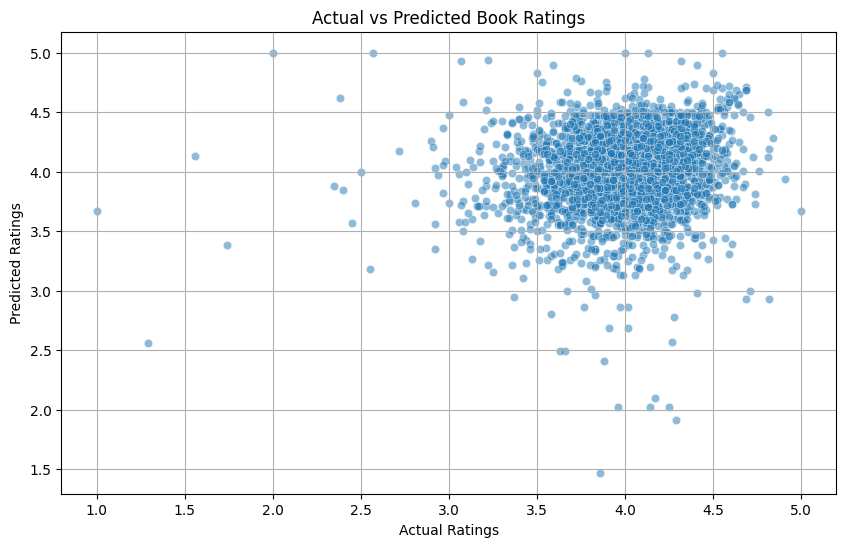

In [52]:
#Predicted vs. Actual Ratings Plot
#Shows how well your model's predictions match the real ratings.

import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Book Ratings")
plt.grid(True)
plt.show()

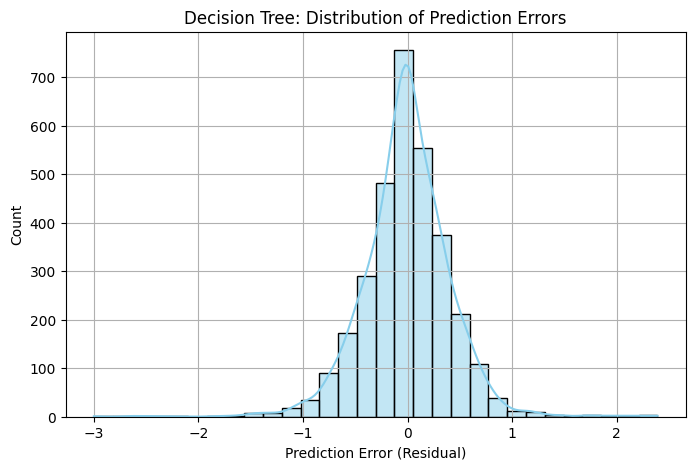

In [55]:
# Histogram of Prediction Errors (Residuals)
# Shows how far off our predictions were from the real ratings.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (actual - predicted)
errors_dt = y_test - y_pred_dt

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(errors_dt, bins=30, kde=True, color='skyblue')
plt.title("Decision Tree: Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Count")
plt.grid(True)
plt.show()